In [65]:
import pandas as pd
from functions import split_by_artist_given, split_by_strata_artist, split_by_strata_artist_designer
from functions import *
from matplotlib import pyplot as plt
from PIL import Image
dataset_name = "fashion"
artist_split = False
feature_extractor = "random_artists"
if dataset_name == 'wikiart':
    df = pd.read_pickle('DATA/Dataset/wikiart/wikiart_full_combined_no_artist_filtered.pkl')
    if feature_extractor == "random_artists":
        df = split_by_artist_random(df)
    else:
        df = split_by_strata_artist(df)
    feature = "image_text_features"
    indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'vincent-van-gogh')].index.tolist()
    
elif dataset_name == 'fashion':
    df = pd.read_pickle('DATA/Dataset/iDesigner/idesigner_influences_cropped_features_mode.pkl')
    feature_extractor = "ResNet34_newsplit"
    if feature_extractor == "random_artists":
        df = split_by_artist_random(df)
    feature = "image_features"
    indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'givenchy')].index.tolist()

    #df = split_by_strata_artist(df)
    #df = split_by_strata_artist_designer(df)
    





# if artist_split:
#     artist_name = "paul-gauguin"
#     feature_extractor = "Artists"
#     df = split_by_artist_given(df, artist_name)
#     IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/{artist_name}_TripletResNet_image_text_features_posrandom_negrandom_100_margin1/IR_metrics/metrics_val.pth')
#     #IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/{artist_name}_TripletResNet_image_features_posrandom_negrandom_100_margin1/IR_metrics/metrics_val.pth')
#     baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/{artist_name}_image_text_features.pth")
# else:

IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/TripletResNet_{feature}_posfaiss_negrandom_100_margin1_notrans_epoch_30/IR_metrics/metrics_val.pth')
#baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/{feature}_val.pth")

indeces = list(df[df['mode'] == 'val'].index)

In [39]:
np.unique(df[df['mode'] == 'val']['artist_name'])

array(['balmain', 'calvin klein', 'chanel', 'dries van noten', 'etro',
       'giorgio armani', 'givenchy', 'gucci', 'hermes',
       'marc by marc jacobs', 'michael kors', 'missoni', 'ralph lauren',
       'tommy hilfiger', 'versace'], dtype=object)

In [44]:
df.loc[22218]

relative_path                    calvin klein/SS19DLR_Klein_052.png
artist_name                                            calvin klein
influenced_by     [calvin klein, yves saint laurent, giorgio arm...
image_features    [tensor(1.0538), tensor(0.8193), tensor(0.2610...
mode                                                            val
Name: 22218, dtype: object

In [49]:
indices

[22220,
 22221,
 22223,
 22228,
 22230,
 22241,
 22247,
 22249,
 22251,
 22253,
 22257,
 22267,
 22269,
 22273,
 22276,
 22277,
 22278,
 22281,
 22283,
 22284,
 22285,
 22288,
 22290,
 22294,
 22295,
 22300,
 22302,
 22304,
 22310,
 22314,
 22315,
 22318,
 22319,
 22322,
 22324,
 22325,
 22326,
 22328,
 22331,
 22334,
 22354,
 22355,
 22357,
 22359,
 22365,
 22367,
 22383,
 22386,
 22392,
 22396,
 22402,
 22410,
 22416,
 22417,
 22426,
 22431,
 22433,
 22436,
 22448,
 22453,
 22455,
 22462,
 22466,
 22467,
 22471,
 22479,
 22490,
 22498,
 22504,
 22507,
 22508,
 22510,
 22512,
 22514,
 22516,
 22517,
 22523,
 22524,
 22525,
 22527,
 22528,
 22530,
 22531,
 22532,
 22536,
 22537,
 22539,
 22541,
 22545,
 22546,
 22549,
 22550,
 22551,
 22552,
 22560,
 22562,
 22573,
 22575,
 22588,
 22595,
 22606,
 22619,
 22621,
 22625,
 22627,
 22629,
 22637,
 22638,
 22641,
 22642,
 22644,
 22646,
 22648,
 22650,
 22657,
 22658,
 22659,
 22664,
 22666,
 22669,
 22671,
 22675,
 22676,
 22681,
 22685,


In [85]:
feature = "image_features"

IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/TripletResNet_{feature}_posrandom_negrandom_100_margin1_notrans_epoch_30/IR_metrics/metrics_val.pth')
baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/{feature}_val.pth")

indeces = list(df[df['mode'] == 'val'].index)
indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'vincent-van-gogh')].index.tolist()

In [142]:
indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'vincent-van-gogh')].index.tolist()

In [68]:
def plot_examples(dataset_name, query, positive_indexes, df):
    # Plot single image
    if dataset_name == 'wikiart':
        general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
    elif dataset_name == 'fashion':
        general_image_path = 'DATA/Dataset/iDesigner/designer_image_train_v2_cropped/'
    plt.figure(figsize=(10, 5))
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.axis('off')
    if dataset_name == 'wikiart':
        title_str = (r"$\bf{Agent:}$ " + df.loc[query].artist_name + '\n'
             r"$\bf{Influencers:}$ " + ',\n'.join(df.loc[query].influenced_by) + 
             '\n' + r"$\bf{date:}$ " + str(df.loc[query].date))
    else:
        title_str = (r"$\bf{Agent:}$ " + df.loc[query].artist_name + '\n'
             r"$\bf{Influencers:}$ " + ',\n'.join(df.loc[query].influenced_by))
    plt.title(title_str , fontsize=10)
    plt.show()
    # Plot grid of images
    fig, axes = plt.subplots(1,10, figsize=(20, 20))  # 5 rows, 2 columns
    for i, ax in enumerate(axes.flatten()):
        if i < len(positive_indexes):
            image_path = general_image_path + df.iloc[positive_indexes[i]].relative_path
            image = Image.open(image_path)
            ax.imshow(image)
            ax.axis('off')
            if dataset_name == 'wikiart':
                title_str = (r"$\bf{rank:}$ " + str(i+1) + '\n'
                r"$\bf{Agent:}$ " +df.loc[positive_indexes[i]].artist_name +'\n' + r"$\bf{date:}$ " + str(df.loc[positive_indexes[i]].date_filled))
            else:
                title_str = (r"$\bf{rank:}$ " + str(i+1) + '\n'
                r"$\bf{Agent:}$ " +df.loc[positive_indexes[i]].artist_name)

            ax.set_title(title_str, fontsize = 10)
        else:
            ax.axis('off')  # Hide unused subplots

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

In [60]:
indices = df[(df['mode'] == 'val') & (df['artist_name'] == 'alexander mcqueen')].index.tolist()


In [8]:
df[df['mode'] == 'val'].index

Index([    4,     7,    11,    13,    17,    18,    20,    23,    25,    27,
       ...
       39782, 39783, 39786, 39792, 39796, 39801, 39807, 39811, 39813, 39814],
      dtype='int64', length=12023)

In [70]:
indices[i]

3199

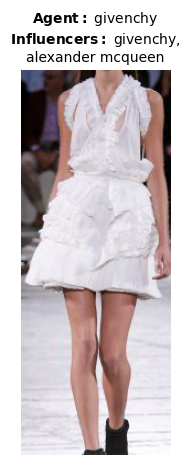

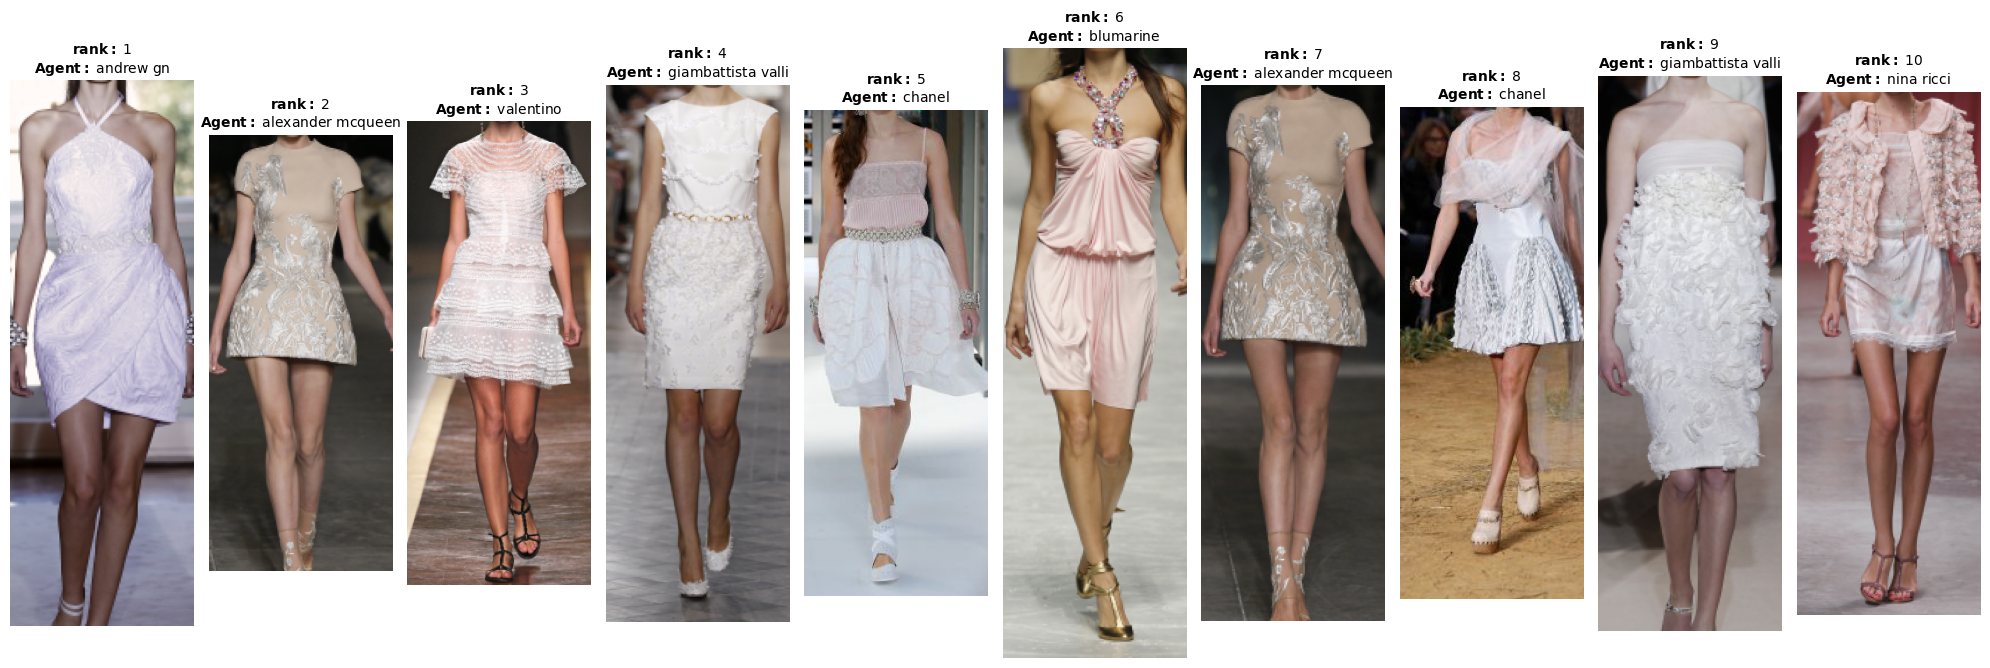

In [69]:
i = 3199


plot_examples(dataset_name, i,IR_metrics['retrieved_indexes'][i], df)

In [88]:
def metrics(IR):
        print(f'Precision at k10 for artist: {IR["precision_at_k_sum"]}, MRR for artist: {IR["mrr_sum"]}')
        print(f'Precision at k10 for second degree artist: {IR["precision_at_k_second_degree_sum"]}, MRR for second degree artist: {IR["mrr_second_degree_sum"]}')

metrics(IR_metrics)

Precision at k10 for artist: 0.192, MRR for artist: 0.294
Precision at k10 for second degree artist: 0.236, MRR for second degree artist: 0.349


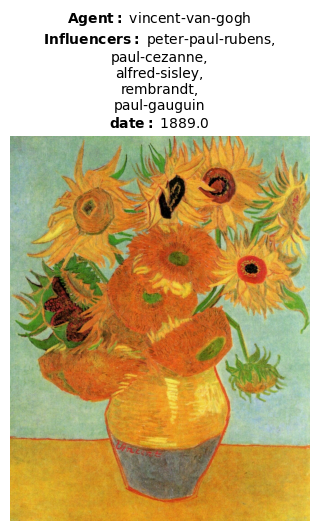

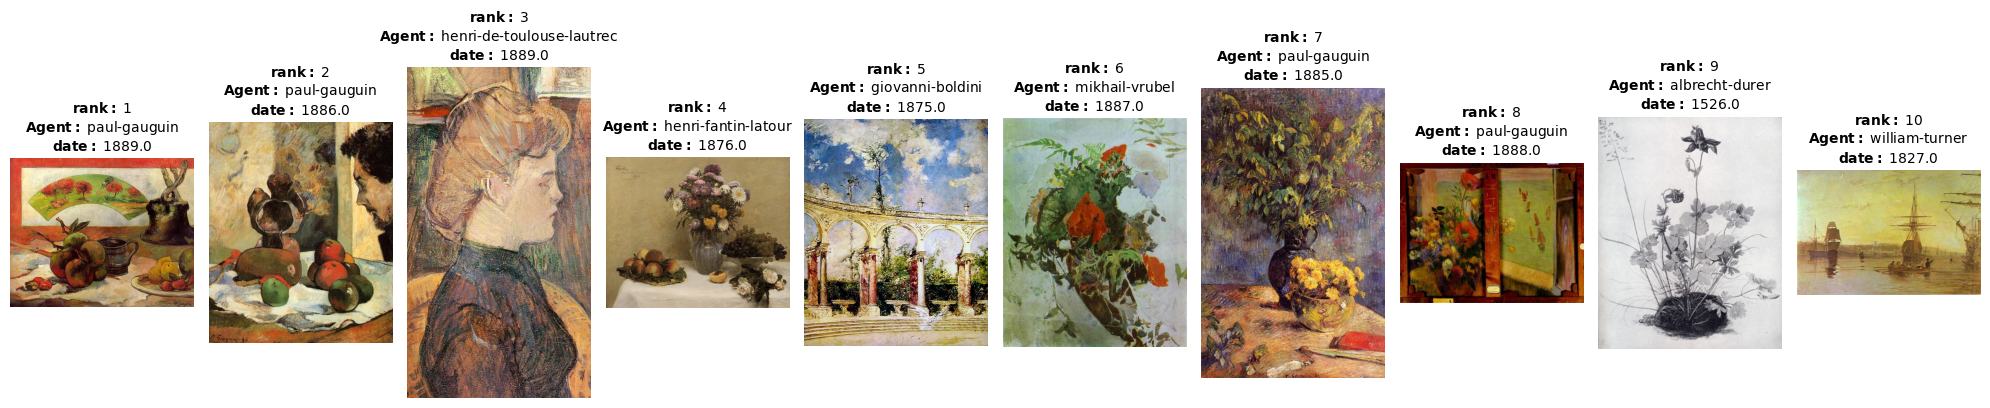

In [80]:
i = 1


plot_examples(dataset_name, indices[i],baseline_IR['retrieved_indexes'][indices[i]], df)

In [72]:
IR_metrics['retrieved_indexes'][indices[i]]
df.loc[73]


image                                piet-mondrian_self-portrait-1918.jpg
relative_path           Post_Impressionism/piet-mondrian_self-portrait...
style_classification                                   post_impressionism
artist_attribution                                          piet-mondrian
timeframe_estimation                                            1900-1950
tag_prediction                                   gentleman,male-portraits
mode                                                                train
date                                                               1918.0
artist_name                                                 piet-mondrian
additional_styles                                                     NaN
artist_school                                                       dutch
tags                               male-portraits,piet-mondrian,gentleman
influenced_by             [pablo-picasso, paul-cezanne, vincent-van-gogh]
title                                 

In [56]:
baseline_IR['retrieved_indexes'][indices[i]]

[63, 4447, 29684, 16503, 3439, 17948, 24919, 30951, 28662, 37170]

In [28]:
df[df['artist_name']=='vincent-van-gogh'].date.max()
grouped = df.groupby('artist_name')
for artist,group in grouped:
    #print(int(group['date_filled'].max()))
    queries = [i for i in list(group.index)]
    print(queries)
    break


[5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 6890, 6891, 6892, 7609, 7610, 7611, 7612, 7613, 7614, 7615, 7616, 7617, 7618, 7619, 7620, 7621, 7622, 7623, 7624, 7625, 7626, 7627, 7628, 7629, 7630, 12616, 12617, 35434]


In [45]:
df.loc[[2,3,4],'date_filled']

2    1883.0
3    1885.0
4    1884.0
Name: date_filled, dtype: float64

In [26]:
df.loc[35797,'date']
indexes = [10126, 21787, 16645, 9548, 28960, 16503, 4593, 161, 14587, 23139]
df.loc[indexes,'date']

10126    1781.0
21787    1869.0
16645    1895.0
9548     1872.0
28960    1981.0
16503    1876.0
4593     1873.0
161      1975.0
14587    1881.0
23139    1888.0
Name: date, dtype: float64

In [27]:
df.loc[35797,'date']

1922.0

In [13]:
baseline_IR['retrieved_indexes'][indices[i]]

[29124, 29188, 29178, 27157, 63, 29937, 4779, 4447, 3439, 17948]

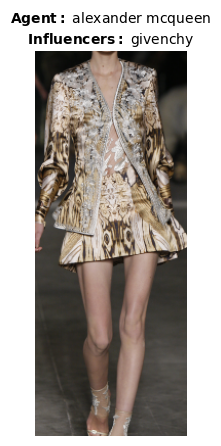

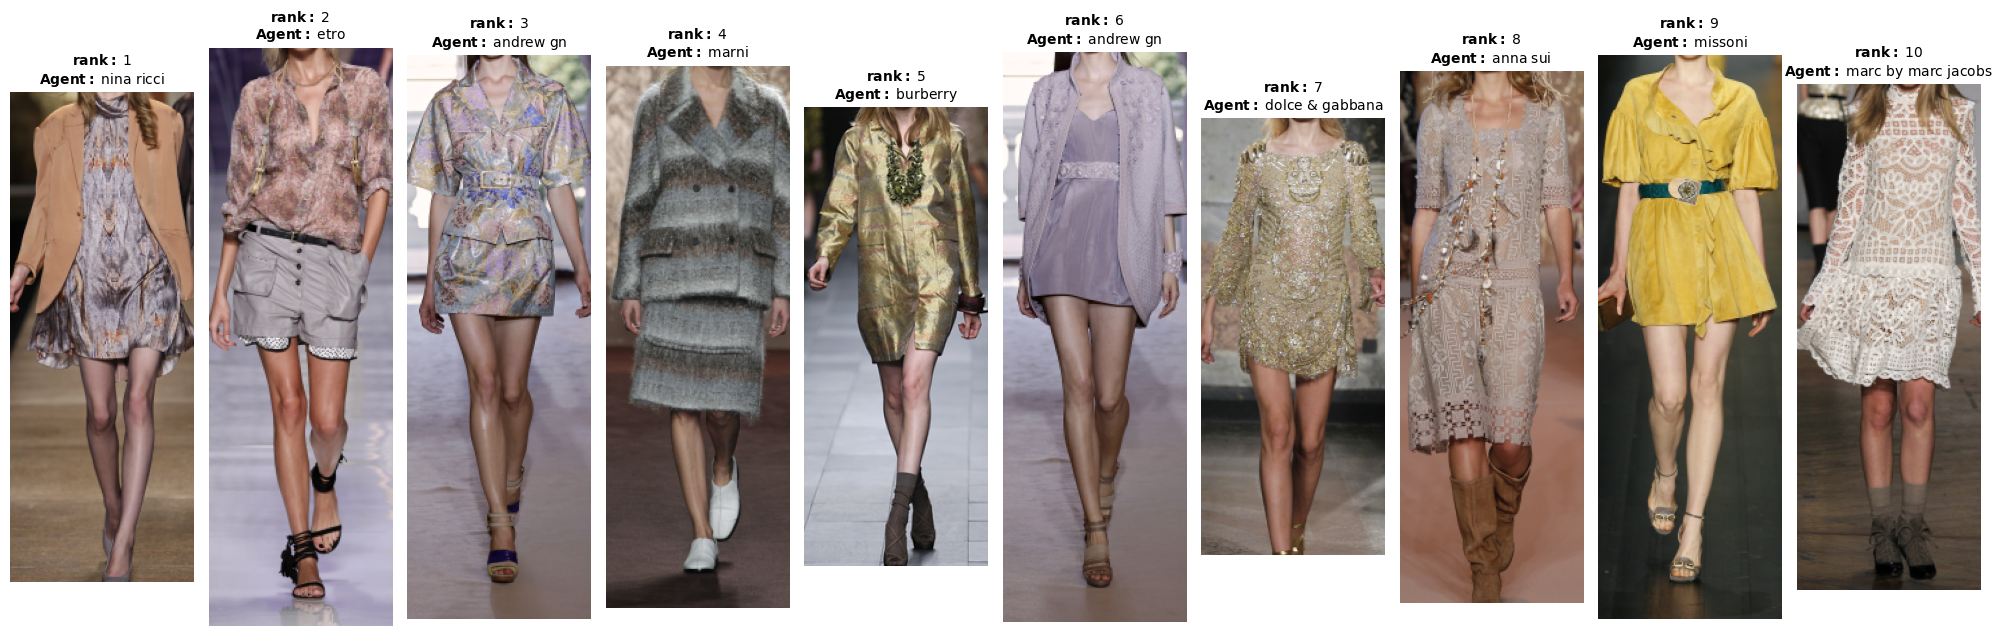

In [57]:



plot_examples(dataset_name, indices[i],baseline_IR['retrieved_indexes'][indices[i]], df)

In [22]:
len(IR_metrics['retrieved_indexes'].index)

11052

In [108]:
df

image  \
0      camille-pissarro_the-harvest-of-hay-in-eragny-...   
1              david-burliuk_marusia-by-the-sea-1949.jpg   
2                 georges-seurat_boy-with-horse-1883.jpg   
3      georges-seurat_the-english-channel-at-grandcam...   
4                   georges-seurat_the-gardener-1884.jpg   
...                                                  ...   
39810            gustave-dore_devils-and-seducers(1).jpg   
39811             gustave-dore_the-innocent-souls(1).jpg   
39812                        gustave-dore_ugolino(1).jpg   
39813                     ivan-aivazovsky_storm-1889.jpg   
39814  ivan-aivazovsky_the-great-roads-at-kronstadt-1...   

                                           relative_path style_classification  \
0      Pointillism/camille-pissarro_the-harvest-of-ha...   post_impressionism   
1      Post_Impressionism/david-burliuk_marusia-by-th...   post_impressionism   
2      Post_Impressionism/georges-seurat_boy-with-hor...   post_impressionism   
3      Pointillism/georges-seurat_the-english-channel...   post_impressionism   
4       Pointillism/georges-seurat_the-gardener-1884.jpg   post_impressionism   
...                                                  ...                  ...   
39810  Romanticism/gustave-dore_devils-and-seducers(1...          romanticism   
39811  Romanticism/gustave-dore_the-innocent-souls(1)...          romanticism   
39812            Romanticism/gustave-dore_ugolino(1).jpg          romanticism   
39813         Romanticism/ivan-aivazovsky_storm-1889.jpg          romanticism   
39814  Romanticism/ivan-aivazovsky_the-great-roads-at...          romanticism   

      artist_attribution timeframe_estimation  \
0       camille-pissarro            1850-1900   
1          david-burliuk            1900-1950   
2         georges-seurat            1850-1900   
3         georges-seurat            1850-1900   
4         georges-seurat            1850-1900   
...                  ...                  ...   
39810       gustave-dore            1850-1900   
39811       gustave-dore            1850-1900   
39812       gustave-dore            1850-1900   
39813    ivan-aivazovsky            1850-1900   
39814    ivan-aivazovsky            1850-1900   

                                tag_prediction   mode    date  \
0                                          NaN  train  1887.0   
1                             female-portraits  train  1949.0   
2                                      animals  train  1883.0   
3                                        water  train  1885.0   
4                                         tree    val  1884.0   
...                                        ...    ...     ...   
39810               fictional-characters,human  train     NaN   
39811                fictional-characters,tree    val     NaN   
39812                     fictional-characters  train     NaN   
39813                                      NaN    val     NaN   
39814  boats-and-ships,seas-and-oceans,vehicle    val  1836.0   

            artist_name additional_styles       artist_school  \
0      camille-pissarro               NaN      french, jewish   
1         david-burliuk               NaN  ukrainian, russian   
2        georges-seurat               NaN              french   
3        georges-seurat               NaN              french   
4        georges-seurat               NaN              french   
...                 ...               ...                 ...   
39810      gustave-dore               NaN              french   
39811      gustave-dore               NaN              french   
39812      gustave-dore               NaN              french   
39813   ivan-aivazovsky               NaN   russian, armenian   
39814   ivan-aivazovsky               NaN   russian, armenian   

                                                    tags  \
0                                                          
1                       female-portraits,marusia-burliuk   
2                         

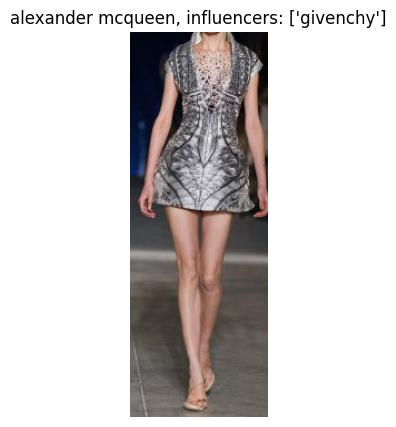

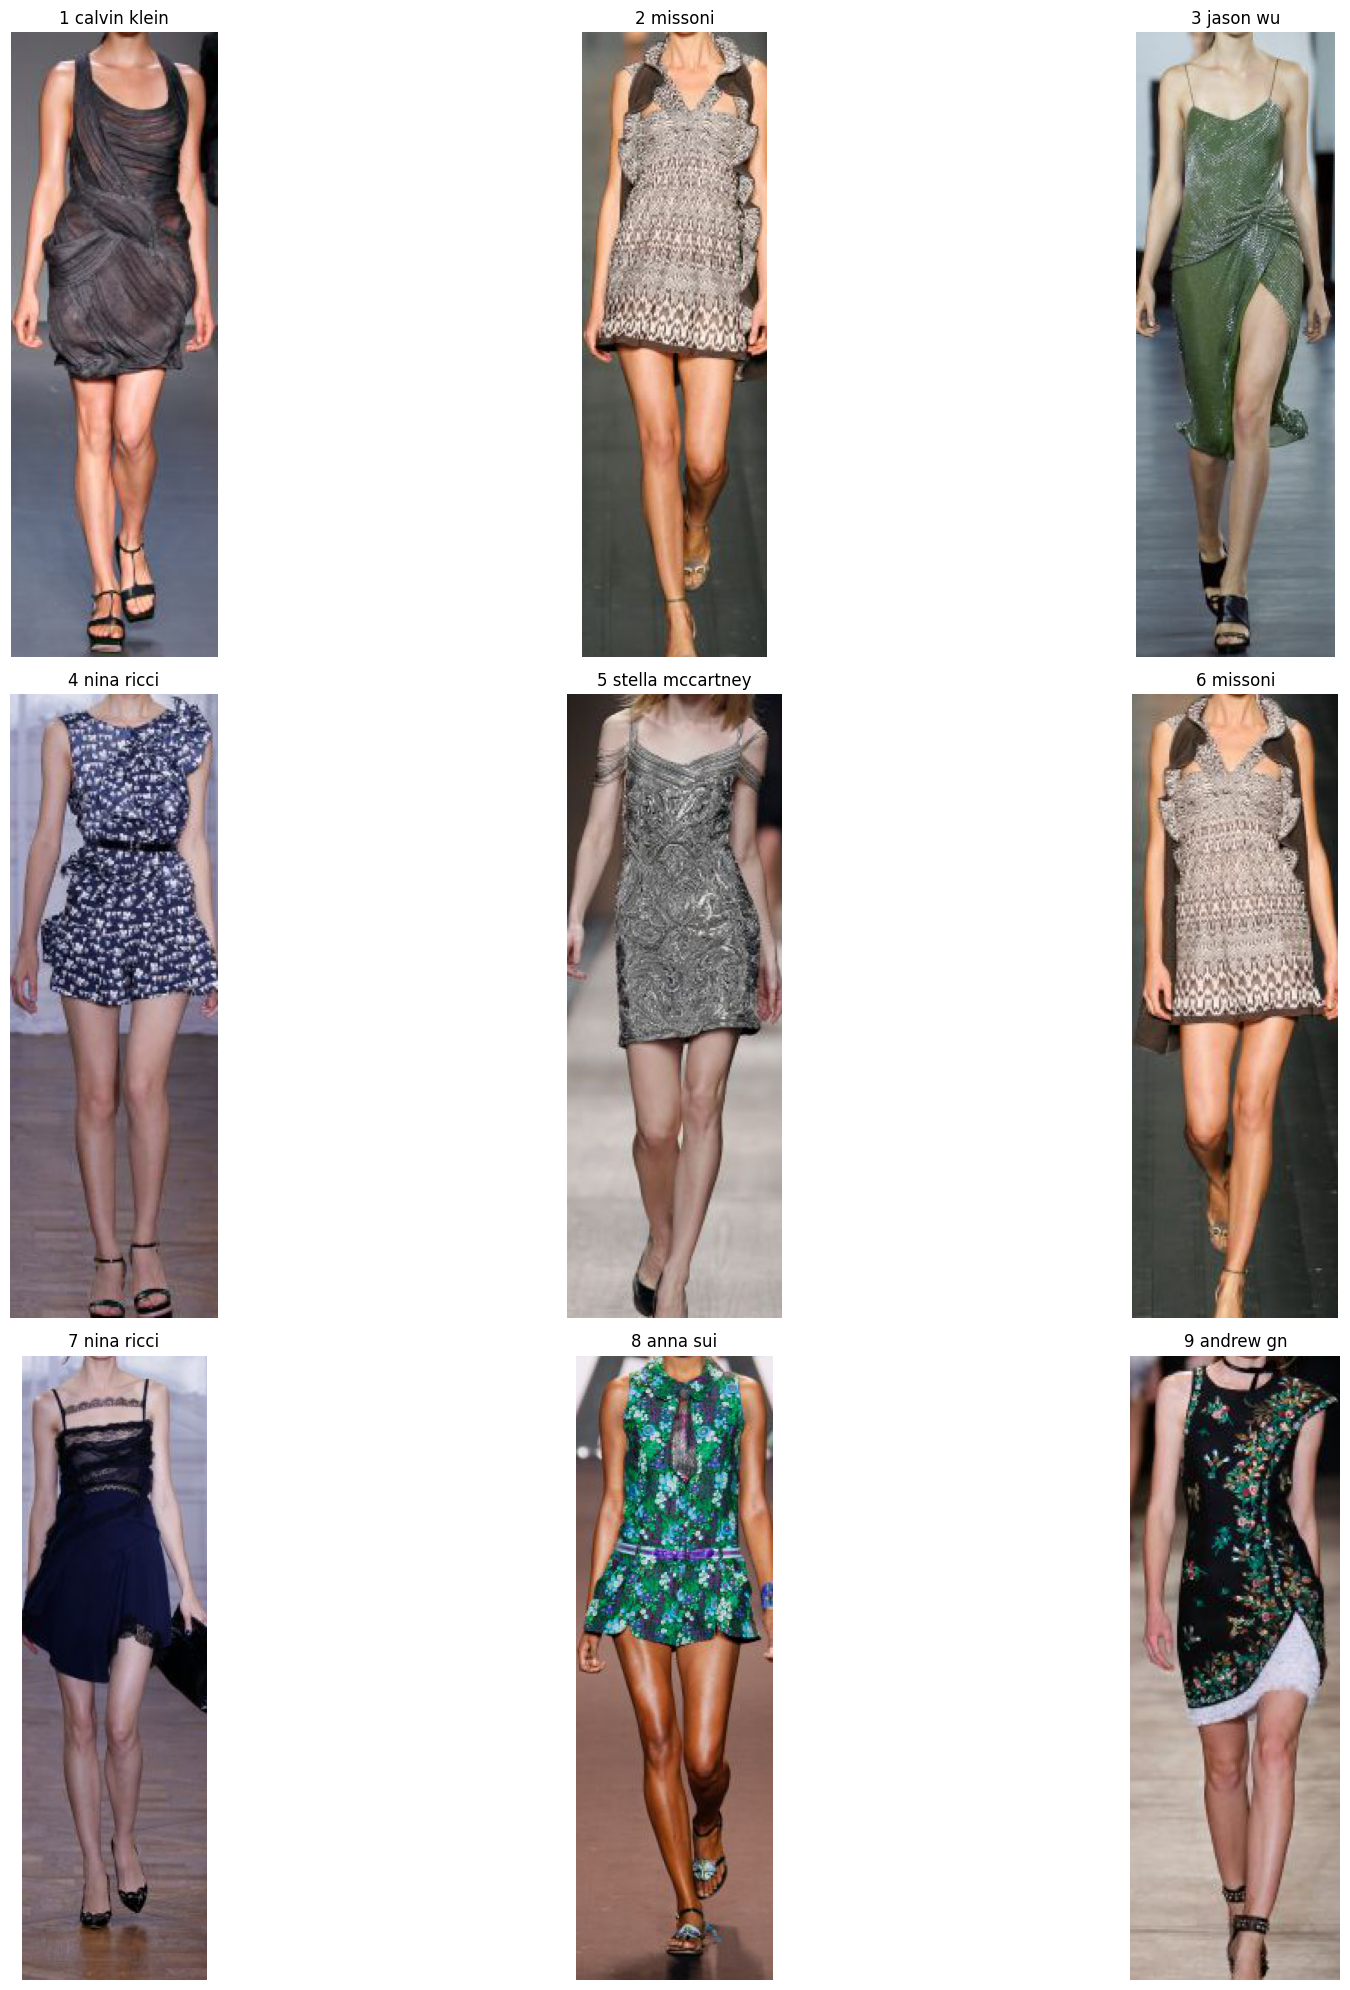

In [10]:

plot_examples(dataset_name, indeces[i],baseline_IR['retrieved_indexes'][indeces[i]], df_new)

In [2]:
import torch
from create_data_loader import TripletLossDataset_features
data = torch.load('DATA/Dataset_toload/wikiart/ResNet34/train_dataset_image_text_features_posfaiss_negrandom_100.pt')


In [24]:
IR_metrics = torch.load(f'trained_models/{dataset_name}/{feature_extractor}/TripletResNet_image_features_posfaiss_negrandom_100_margin1/IR_metrics/metrics_train.pth')
indeces = list(df_new[df_new['mode'] == 'train'].index)
baseline_IR = torch.load(f"trained_models/{dataset_name}/{feature_extractor}/baseline_IR_metrics/image_features_train.pth")

In [15]:
#Realism/edouard-manet_olympia-1863.jpg
#Post_Impressionism/paul-gauguin_the-spirit-of-the-dead-watches-1892.jpg

#Post_Impressionism/vincent-van-gogh_the-starry-night-1889(1).jpg
df_new[df_new['relative_path'] == 'Post_Impressionism/paul-gauguin_the-spirit-of-the-dead-watches-1892.jpg']
df_new[df_new['relative_path'] == 'Post_Impressionism/vincent-van-gogh_the-starry-night-1889(1).jpg']

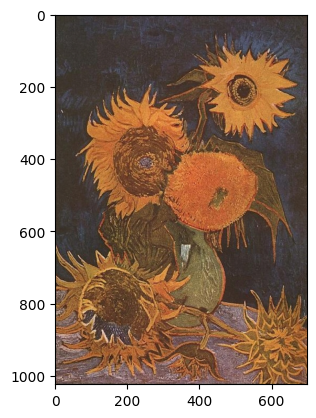

In [61]:
plt.imshow(Image.open(general_image_path+'Post_Impressionism/vincent-van-gogh_the-starry-night-1889(1).jpg'))

plt.imshow(Image.open(general_image_path+'Post_Impressionism/vincent-van-gogh_still-life-vase-with-five-sunflowers-1888.jpg'))

In [8]:
from matplotlib import pyplot as plt
from PIL import Image
general_image_path = '/home/tliberatore2/Reproduction-of-ArtSAGENet/wikiart/'
def plot_examples(query, positive_indexes, df):
    # Plot single image
    plt.figure(figsize=(10, 5))
    plt.imshow(Image.open(general_image_path + df.loc[query].relative_path))
    plt.axis('off')
    plt.title(str(df.loc[query].artist_name + ', influencers: ' + str(df.loc[query].influenced_by)))
    plt.show()

    # Plot grid of images
    fig, axes = plt.subplots(3,3, figsize=(20, 20))  # 5 rows, 2 columns
    for i, ax in enumerate(axes.flatten()):
        if i < len(positive_indexes):
            image_path = general_image_path + df.iloc[positive_indexes[i]].relative_path
            image = Image.open(image_path)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(str(i+1)+" "+ df.iloc[positive_indexes[i]].artist_name)
        else:
            ax.axis('off')  # Hide unused subplots

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
